<a href="https://colab.research.google.com/github/indrikwijaya/Approaching-Any-ML-Problem/blob/master/2_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. mount gdrive to gcolab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Approaching-Any-ML-Problem

/content/drive/MyDrive/Colab Notebooks/Approaching-Any-ML-Problem


# Evaluation Metrics
Classification:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under ROC (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)

Regression:
- MAE
- MSE
- RMSE
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- $R^2$

# Classification

## Binary Classification problem

- only 2 targets
- eg. classifying chest x-ray images: images w/ no problem and images w/ collapsed lung (pneumothorax)
- assume equal # of pneumothorax and non-pneumothorax images (100 each)

1st step: divide into training and validation set
- equal # of positive and negatie samples in a binary classification -> use accuracy, precision, recall and f1



In [3]:
def accuracy(y_true, y_pred): 
  """
  Function to calculate accuracy
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: accuracy score
  """

  # initialize a simple counter for correct predictions
  correct_counter = 0
  # loop over all elements of y_true and y_pred
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct_counter += 1
  return correct_counter/len(y_true)

Now, let’s say we change the dataset a bit such that there are 180 chest x-ray images which do not have pneumothorax and only 20 with pneumothorax. Even in this case, we will create the training and validation sets with the same ratio of positive to negative (pneumothorax to non- pneumothorax) targets. In each set, we have 90 non- pneumothorax and 10 pneumothorax images. If you say that all images in the
validation set are non-pneumothorax, what would your accuracy be? Let’s see; you classified 90% of the images correctly. So, your accuracy is 90%.

You didn’t even build a model and got an accuracy of 90%. That seems kind of useless. If we look carefully, we will see that the dataset is skewed, i.e., the number of samples in one class outnumber the number of samples in other class by a lot. In these kinds of cases, it is not advisable to use accuracy as an evaluation metric as it is not representative of the data. So, you might get high accuracy, but your model
will probably not perform that well when it comes to real-world samples, and you won’t be able to explain to your managers why.

In these cases, it’s better to look at other metrics such as precision. Before learning about precision, we need to know a few terms. Here we have assumed that chest x-ray images with pneumothorax are positive class (1) and without pneumothorax are negative class (0).

Given an image,
**True Positive (TP)**: prediction = pneumothorax, actual = pneumothorax

**True Negative (TN)**: prediction = non-pneumothorax, actual = non-pneumothorax

I.e. if model correctly predicts +ve class -> TP; if model correctly predicts -ve class -> TN

**False Positive (FP)**: prediction = pneumothorax, actual = non-pneumothorax

**False Negative (FN)**: prediction = non-pneumothorax, actual = pneumothorax

i.e. If model falsely predicts +ve class -> FP; if model false predicts -ve class -> FN

In [5]:
def true_positive(y_true, y_pred):
  """
  Function to calculate True Positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true positives
  """
  # initialize
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  return tp

def true_negative(y_true, y_pred):
  """
  Function to calculate True Negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of true negatives
  """
  # initialize
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
     tn += 1
  return tn

def false_positive(y_true, y_pred):
  """
  Function to calculate False Positives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false positives
  """
  # initialize
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
     fp += 1
  return fp

def false_negative(y_true, y_pred):
  """
  Function to calculate False Negatives
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: number of false negatives
  """
  # initialize
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  return fn

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$


In [6]:
def accuracy_v2(y_true, y_pred):
  """
  Function to calculate accuracy using tp/tn/fp/fn
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: accuracy score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  accuracy_score = (tp + tn) / (tp + tn + fp + fn)
  return accuracy_score

$Precision = \frac{TP}{TP + FP}$

-> Tells us how correct our model is in identifying +ve class

In [15]:
def precision(y_true, y_pred):
  """
  Function to calculate precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: precision score
  """
  tp = true_positive(y_true, y_pred)
  fp = false_positive(y_true, y_pred)
  precision = tp / (tp + fp)
  return precision

$Recall (TPR) = \frac{TP}{TP + FN}$

-> Or Sensitivity, Tells us how correct our model in identifying +ve classes out of both classes

In [16]:
def recall(y_true, y_pred):
  """
  Function to calculate recall
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: recall score
  """
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall

For a “good” model, our precision and recall values should be high. Let's say our model produces quite a lot of false positives but less false negatives. Fewer false negatives are good in this type of problem because you don’t want to say that patients don't have pneumothorax when they do. But we do have a lot of Fps, and that's not good either.

Most of the models predict a probability, and when we predict, we usually choose this threshold to be 0.5. This threshold is not always ideal, and depending on this threshold, your value of precision and recall can change drastically. If for every threshold we choose, we calculate the precision and recall values, we can create a plot between these sets of values. This plot or curve is known as the precision-recall curve.

In [10]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273, 0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

So, y_true is our targets, and y_pred is the probability values for a sample being assigned a value of 1. So, now, we look at probabilities in prediction instead of the predicted value (which is most of the time calculated with a threshold at 0.5).

In [17]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377, 0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942, 0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

Text(0, 0.5, 'Precision')

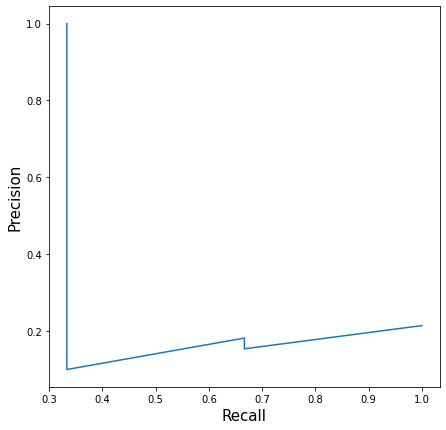

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

You will notice that it’s challenging to choose a value of threshold that gives both good precision and recall values. If the threshold is too high, you have a smaller number of true positives and a high number of false negatives. This decreases your recall; however, your precision score will be high. If you reduce the threshold too low, false positives will increase a lot, and precision will be less.

Both precision and recall range from 0 to 1 and a value closer to 1 is better. F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall. If we denote precision using P and recall using R, we can represent the F1 score as:

$F1 = \frac{2PR}{P + R} = \frac{2TP}{2TP + FP + FN}$

In [19]:
def f1(y_true, y_pred):
  """
  Function to calculate f1 score
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: f1 score
  """
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  score = 2 * p * r / (p + r)
  return score

Instead of looking at precision and recall individually, you can also just look at F1 score. Same as for precision, recall and accuracy, F1 score also ranges from 0 to 1, and a perfect prediction model has an F1 of 1. When dealing with datasets that have skewed targets, we should look at F1 (or precision and recall) instead of accuracy. Then there are other crucial terms that we should know about.

TPR or sensitivity which is already mentioned about as it's equal to Recall

$FPR = \frac{FP}{TN + FP}$

In [22]:
tpr = recall
def fpr(y_true, y_pred):
  """
  Function to calculate fpr
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: fpr
  """
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  return fp / (tn + fp)

$TNR = 1 - FPR$

In [23]:
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
  # calculate predictions for a given threshold
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  # calculate tpr
  temp_tpr = tpr(y_true, temp_pred)
  # calculate fpr
  temp_fpr = fpr(y_true, temp_pred)
  # append tpr and fpr to lists
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

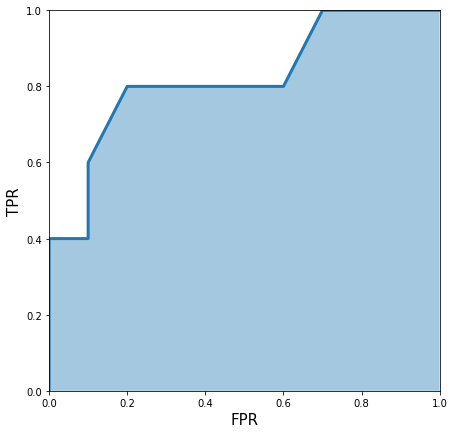

In [24]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

This curve is also known as the Receiver Operating Characteristic (ROC). And if we calculate the area under this ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve. For this particular purpose, we will stick to the fantastic implementation by scikitlearn.

In [25]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
roc_auc_score(y_true, y_pred)

0.8300000000000001

AUC values range from 0 to 1.
- AUC = 1 implies you have a perfect model. Most of the time, it means that you made some mistake with validation and should revisit data processing and validation pipeline of yours. If you didn’t make any mistakes, then congratulations, you have the best model one can have for the dataset you
built it on.
- AUC = 0 implies that your model is very bad (or very good!). Try inverting the probabilities for the predictions, for example, if your probability for the positive class is p, try substituting it with 1-p. This kind of AUC may also mean that there is some problem with your validation or data processing.
- AUC = 0.5 implies that your predictions are random. So, for any binary classification problem, if I predict all targets as 0.5, I will get an AUC of 0.5.
AUC values between 0 and 0.5 imply that your model is worse than random. Most of the time, it’s because you inverted the classes. If you try to invert your predictions, your AUC might become more than 0.5. AUC values closer to 1 are
considered good.

But what does AUC say about our model?

Suppose you get an AUC of 0.85 when you build a model to detect pneumothorax from chest x-ray images. This means that if you select a random image from your dataset with pneumothorax (positive sample) and another random image without pneumothorax (negative sample), then the pneumothorax image will rank higher than a non-pneumothorax image with a probability of 0.85.

After calculating probabilities and AUC, you would want to make predictions on the test set. Depending on the problem and use-case, you might want to either have probabilities or actual classes. If you want to have probabilities, it’s effortless. You already have them. If you want to have classes, you need to select a threshold. In the case of binary classification, you can do something like the following.

**Prediction = Probability >= Threshold**

Which means, that prediction is a new list which contains only binary variables. An item in prediction is 1 if the probability is greater than or equal to a given threshold
else the value is 0. And guess what, you can use the ROC curve to choose this threshold! The ROC curve will tell you how the threshold impacts false positive rate and true positive rate and thus, in turn, false positives and true positives. You should choose the threshold that is best suited for your problem and datasets.

For example, if you don’t want to have too many false positives, you should have a high threshold value. This will, however, also give you a lot more false negatives. Observe the trade-off and select the best threshold. Let’s see how these thresholds impact true positive and false positive values.

In [31]:
tp_list = []
fp_list = []
tpr_list = []
fpr_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 
          0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
  # calculate predictions for a given threshold
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  # calculate tp
  temp_tp = true_positive(y_true, temp_pred)
  temp_tpr = tpr(y_true, temp_pred)
  # calculate fp
  temp_fp = false_positive(y_true, temp_pred)
  temp_fpr = fpr(y_true, temp_pred)
  # append tp and fp to lists
  tp_list.append(temp_tp)
  fp_list.append(temp_fp)
  tpr_list.append(temp_tpr)
  fpr_list.append(temp_fpr)

In [30]:
tp_list
fp_list

[10, 9, 7, 6, 3, 3, 2, 1, 1, 1, 0, 0, 0]

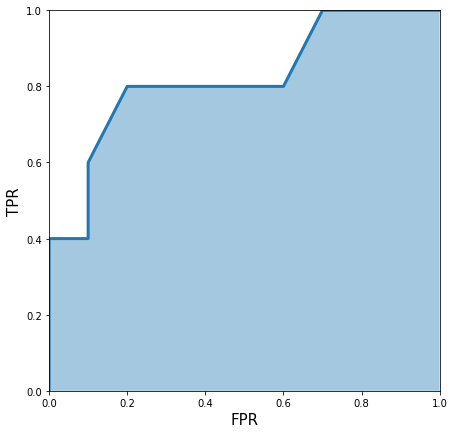

In [32]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

Most of the time, the top-left value on ROC curve should give you a quite good threshold, as shown in figure above.
Comparing the table and the ROC curve, we see that a threshold of around 0.6 is quite good where we do not lose a lot of true positives and neither we have a lot of
false positives.

AUC is a widely used metric for skewed binary classification tasks in the industry, and a metric everyone should know about. Once you understand the idea behind AUC, as explained in the paragraphs above, it is also easy to explain it to nontechnical people who would probably be assessing your models in the industry.

Another important metric you should learn after learning AUC is log loss. In case of a binary classification problem, we define log loss as:

$\text{Log Loss} = -1.0 * (\text{target} * \log(\text{prediction}) + (1 - \text{target})*\log(1-\text{prediction}))$

Where target is either 0 or 1 and prediction is a probability of a sample belonging to class 1

For multiple samples in the dataset, the log-loss over all samples is a mere average of all individual log losses. One thing to remember is that log loss penalizes quite high for an incorrect or a far-off prediction, i.e. log loss punishes you for being very sure and very wrong.

In [33]:
import numpy as np
def log_loss(_true, y_proba):
  """
  Function to calculate log loss
  :param y_true: list of true values
  :param y_proba: list of probabilities for 1
  :return: overall log loss
  """
  # define an epsilon value
  # this can also be an input
  # this value is used to clip probabilities
  epsilon = 1e-15
  # initialize empty list to store
  # individual losses
  loss = []
  # loop over all true and predicted probability values
  for yt, yp in zip(y_true, y_proba):
    # adjust probability
    # 0 gets converted to 1e-15
    # 1 gets converted to 1-1e-15
    # Why? Think about it!
    yp = np.clip(yp, epsilon, 1 - epsilon)
    # calculate loss for one sample
    temp_loss = - 1.0 * (
    yt * np.log(yp)
    + (1 - yt) * np.log(1 - yp)
    )
  # add to loss list
    loss.append(temp_loss)
  # return mean loss over all samples
  return np.mean(loss)

In [34]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
                   0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
                   0.85, 0.15, 0.99]
log_loss(y_true, y_proba)

0.49882711861432294

For example, if you are 51% sure about a sample belonging to class 1, log loss
would be:
- 1.0 * ( 1 * log(0.51) + (1 - 1) * log(1 – 0.51) ) = 0.67

And if you are 49% sure for a sample belonging to class 0, log loss would be:
- 1.0 * ( 0 * log(0.49) + (1 - 0) * log(1 – 0.49) ) = 0.67

So, even though we can choose a cut off at 0.5 and get perfect predictions, we will
still have a very high log loss. So, when dealing with log loss, you need to be very
careful; any non-confident prediction will have a very high log loss.



## Multi-class
Most of the metrics that we discussed until now can be converted to a multi-class
version. The idea is quite simple. Let’s take precision and recall. We can calculate
precision and recall for each class in a multi-class classification problem.
There are three different ways to calculate this which might get confusing from time
to time. Let’s assume we are interested in precision first. We know that precision
depends on true positives and false positives.
- **Macro averaged precision**: calculate precision for all classes individually
and then average them
- **Micro averaged precision**: calculate class wise true positive and false
positive and then use that to calculate overall precision
- **Weighted precision**: same as macro but in this case, it is weighted average
depending on the number of items in each class

In [37]:
def macro_precision(y_true, y_pred):
  """
  Function to calculate macro averaged precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: macro precision score
  """
  # find the number of classes by taking
  # length of unique values in true list
  num_classes = len(np.unique(y_true))
  # initialize precision to 0
  precision = 0
  # loop over all classes
  for class_ in range(num_classes):
    # all classes except current are considered negative
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    # calculate true positive for current class
    tp = true_positive(temp_true, temp_pred)
    # calculate false positive for current class
    fp = false_positive(temp_true, temp_pred)
    # calculate precision for current class
    temp_precision = tp / (tp + fp)
    # keep adding precision for all classes
    precision += temp_precision
  # calculate and return average precision over all classes
  precision /= num_classes
  return precision

def micro_precision(y_true, y_pred):
  """
  Function to calculate micro averaged precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: micro precision score
  """
  # find the number of classes by taking
  # length of unique values in true list
  num_classes = len(np.unique(y_true))
  # initialize tp and fp to 0
  tp = 0
  fp = 0
  # loop over all classes
  for class_ in range(num_classes):
    # all classes except current are considered negative
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    # calculate true positive for current class
    # and update overall tp
    tp += true_positive(temp_true, temp_pred)
    # calculate false positive for current class
    # and update overall tp
    fp += false_positive(temp_true, temp_pred)
  # calculate and return overall precision
  precision = tp / (tp + fp)
  return precision

In [38]:
from collections import Counter
import numpy as np
def weighted_precision(y_true, y_pred):
  """
  Function to calculate weighted averaged precision
  :param y_true: list of true values
  :param y_pred: list of predicted values
  :return: weighted precision score
  """
  # find the number of classes by taking
  # length of unique values in true list
  num_classes = len(np.unique(y_true))
  # create class:sample count dictionary
  # it looks something like this:
  # {0: 20, 1:15, 2:21}
  class_counts = Counter(y_true)
  # initialize precision to 0
  precision = 0
  # loop over all classes
  for class_ in range(num_classes):
    # all classes except current are considered negative
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]
    # calculate tp and fp for class
    tp = true_positive(temp_true, temp_pred)
    fp = false_positive(temp_true, temp_pred)
    # calculate precision of class
    temp_precision = tp / (tp + fp)
    # multiply precision with count of samples in class
    weighted_precision = class_counts[class_] * temp_precision
    # add to overall precision
    precision += weighted_precision
  # calculate overall precision by dividing by
  # total number of samples
  overall_precision = precision / len(y_true)
  return overall_precision

Similarly, we can implement **recall metric for multi-class* and **F1 metric for multi-class**

Thus, we have precision, recall and F1 implemented for multi-class problems. You
can similarly convert AUC and log loss to multi-class formats too. This format of
conversion is known as one-vs-all. 

In binary or multi-class classification, it is also quite popular to take a look at confusion matrix. Don’t be confused; it’s quite easy. A confusion matrix is nothing
but a table of TP, FP, TN and FN. Using the confusion matrix, you can quickly see how many samples were misclassified and how many were classified correctly.

One might argue that the confusion matrix should be covered quite early in this chapter, but I chose not to do it. If you understand TP, FP, TN, FN, precision, recall and AUC, it becomes quite easy to understand and interpret confusion matrix. Sometimes, people also prefer calling FP as Type-I error and FN as Type-II error.

Text(0.5, 12.5, 'Predicted Labels')

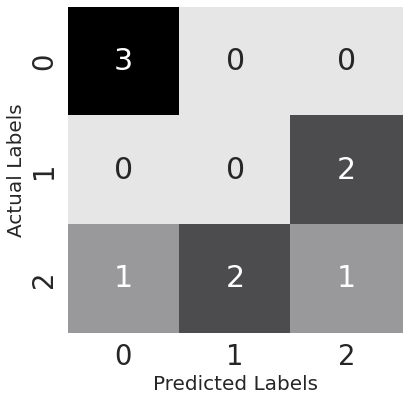

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(6, 6))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0,
as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

## Multi-label classification

In multi-label classification, each sample can have one or more
classes associated with it. One simple example of this type of problem would be a
task in which you are asked to predict different objects in a given image. So, one image can have multiple targets associated with it.

<img src = 'https://www.flickr.com/photos/krakluski/2950388100'/>

The metrics for this type of classification problem are a bit different. Some suitable
and most common metrics are:
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)
- Log loss

P@k

If you have a list of original classes for a given sample and list of predicted classes for the same, precision is defined as the number of hits in the predicted list considering only top-k predictions, divided by k.

In [42]:
def pk(y_true, y_pred, k):
  """
  This function calculates precision at k
  for a single sample
  :param y_true: list of values, actual classes
  :param y_pred: list of values, predicted classes
  :param k: the value for k
  :return: precision at a given value k
  """
  # if k is 0, return 0. we should never have this
  # as k is always >= 1
  if k == 0:
    return 0
  # we are interested only in top-k predictions
  y_pred = y_pred[:k]
  # convert predictions to set
  pred_set = set(y_pred)
  # convert actual values to set
  true_set = set(y_true)
  # find common values
  common_values = pred_set.intersection(true_set)
  # return length of common values over k
  return len(common_values) / len(y_pred[:k])

AP@k is calculated using P@k.
For example, if we have to calculate AP@3, we calculate P@1, P@2 and P@3 and
then divide the sum by 3.

In [43]:
def apk(y_true, y_pred, k):
  """
  This function calculates average precision at k
  for a single sample
  :param y_true: list of values, actual classes
  :param y_pred: list of values, predicted classes
  :return: average precision at a given value k
  """
  # initialize p@k list of values
  pk_values = []
  # loop over all k. from 1 to k + 1
  for i in range(1, k + 1):
    # calculate p@i and append to list
    pk_values.append(pk(y_true, y_pred, i))
  # if we have no values in the list, return 0
  if len(pk_values) == 0:
    return 0
  # else, we return the sum of list over length of list
  return sum(pk_values) / len(pk_values)

In machine learning,
we are interested in all samples, and that’s why we have mean average precision
at k or MAP@k. MAP@k is just an average of AP@k

In [45]:
def mapk(y_true, y_pred, k):
  """
  This function calculates mean avg precision at k
  for a single sample
  :param y_true: list of values, actual classes
  :param y_pred: list of values, predicted classes
  :return: mean avg precision at a given value k
  """
  # initialize empty list for apk values
  apk_values = []
  # loop over all samples
  for i in range(len(y_true)):
    # store apk values for every sample
    apk_values.append(apk(y_true[i], y_pred[i], k = k))

  return sum(apk_values)/len(apk_values)

log loss for multi-label classification. 

You can convert the targets to binary format and then use a log loss for each column. In the end, you can take the average of log loss in each column. This is also known as
mean column-wise log loss.



# Regression

The most common metric in regression is error. Error is simple and very easy to
understand.
$Error = True Value – Predicted Value$

Absolute error is just absolute of the above.

$Absolute Error =  |True Value – Predicted Value|$

Then we have mean absolute error (MAE). It’s just mean of all absolute errors.

Mean squared error (MSE)

RMSE

SLE

RMSLE

Percentage error

Mean absolute percentage error

The best thing about regression is that there are only a few most popular metrics
that can be applied to almost every regression problem. And it is much easier to
understand when we compare it to classification metrics.
Let’s talk about another regression metric known as R2 (R-squared), also known
as the coefficient of determination.
In simple words, R-squared says how good your model fits the data. R-squared
closer to 1.0 says that the model fits the data quite well, whereas closer 0 means
that model isn’t that good. R-squared can also be negative when the model just
makes absurd predictions.

$R^2 = 1 - \frac{\sum_{i = 1}^N (y_{ti} - y_{pi})^2}{\sum_{i=1}^N(y_{ti} - y_{t_{mean}})}$

In [47]:
def r2(y_true, y_pred):
  """
  This function calculates r-squared score
  :param y_true: list of real numbers, true values
  :param y_pred: list of real numbers, predicted values
  :return: r2 score
  """
  # calculate the mean value of true values
  mean_true_value = np.mean(y_true)
  # initialize numerator with 0
  numerator = 0
  # initialize denominator with 0
  denominator = 0
  # loop over all true and predicted values
  for yt, yp in zip(y_true, y_pred):
    # update numerator
    numerator += (yt - yp) ** 2
    # update denominator
    denominator += (yt - mean_true_value) ** 2
  # calculate the ratio
  ratio = numerator / denominator
  # return 1 - ratio
  return 1 - ratio

# Unsupervised Learning
One thing to keep in mind is that to evaluate un-supervised methods, for example,
some kind of clustering, it’s better to create or manually label the test set and keep
it separate from everything that is going on in your modelling part. When you are
done with clustering, you can evaluate the performance on the test set simply by
using any of the supervised learning metrics.